# JamUNet model trained with the spatial dataset - training and validation

This notebook was used for training and validating the model.

In [1]:
# # move to root directory

%cd ..

/workspace/jamunet-morpho-braided


In [2]:
# reload modules to avoid restarting the notebook every time these are updated

%load_ext autoreload
%autoreload 2

In [3]:
# import modules 

import torch
import joblib
import copy 

from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR

from model.train_eval import * 
from preprocessing.dataset_generation import create_full_dataset
from preprocessing.dataset_generation import combine_datasets
from postprocessing.save_results import *
from postprocessing.plot_results import *

import sys
sys.path.append('model/')
from Lazydata import LazyDataset, build_samples

# enable interactive widgets in Jupyter Notebook
%matplotlib inline
%matplotlib widget

In [4]:
# set the device where operations are performed
# if only one GPU is present you might need to remove the index "0" 
# torch.device('cuda:0') --> torch.device('cuda') / torch.cuda.get_device_name(0) --> torch.cuda.get_device_name() 

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print("CUDA Device Count: ", torch.cuda.device_count())
    print("CUDA Device Name: ", torch.cuda.get_device_name(0))
else:
    device = 'cpu'
    
print(f'Using device: {device}')

CUDA Device Count:  1
CUDA Device Name:  NVIDIA A40
Using device: cuda:0


In [5]:
import os
num_cpus = os.cpu_count()  # total logical cores
print("Logical CPU cores:", num_cpus)

Logical CPU cores: 96


In [6]:
# set common keys required for functions

train = 'training'
val = 'validation'
test = 'testing'

In [7]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /workspace/jamunet-morpho-braided


In [8]:
import os
import os
print("Working directory:", os.getcwd())

Working directory: /workspace/jamunet-morpho-braided


**<span style="color:red">Attention!</span>** 
\
Uncomment the next cells if larger training, validation, and testing datasets are needed. These cells load all months datasets (January, February, March, and April) and then merge them into one dataset. 
\
Keep in mind that due to memory constraints, it is likely that not all four datasets can be loaded. 
\
Make sure to load the training, validation, and testing datasets in different cells to reduce memory issues.

In [9]:
# dataset_jan = r'data\satellite\dataset_month1'
# dataset_feb = r'data\satellite\dataset_month2'
# dataset_mar = r'data\satellite\dataset_month3'
# dataset_apr = r'data\satellite\dataset_month4'

# dtype=torch.float32

In [10]:
# inputs_train_jan, targets_train_jan = create_full_dataset(train, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_train_feb, targets_train_feb = create_full_dataset(train, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_train_mar, targets_train_mar = create_full_dataset(train, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_train_apr, targets_train_apr = create_full_dataset(train, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_train = torch.cat((inputs_train_jan, inputs_train_feb, inputs_train_mar, inputs_train_apr))
# targets_train = torch.cat((targets_train_jan, targets_train_feb, targets_train_mar, targets_train_apr))
# train_set = TensorDataset(inputs_train, targets_train)

In [11]:
# inputs_val_jan, targets_val_jan = create_full_dataset(val, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_val_feb, targets_val_feb = create_full_dataset(val, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_val_mar, targets_val_mar = create_full_dataset(val, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_val_apr, targets_val_apr = create_full_dataset(val, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_val = torch.cat((inputs_val_jan, inputs_val_feb, inputs_val_mar, inputs_val_apr))
# targets_val = torch.cat((targets_val_jan, targets_val_feb, targets_val_mar, targets_val_apr))
# val_set = TensorDataset(inputs_val, targets_val)

In [12]:
# inputs_test_jan, targets_test_jan = create_full_dataset(test, dir_folders=dataset_jan, device=device, dtype=dtype).tensors
# inputs_test_feb, targets_test_feb = create_full_dataset(test, dir_folders=dataset_feb, device=device, dtype=dtype).tensors
# inputs_test_mar, targets_test_mar = create_full_dataset(test, dir_folders=dataset_mar, device=device, dtype=dtype).tensors
# inputs_test_apr, targets_test_apr = create_full_dataset(test, dir_folders=dataset_apr, device=device, dtype=dtype).tensors

# inputs_test = torch.cat((inputs_test_jan, inputs_test_feb, inputs_test_mar, inputs_test_apr))
# targets_test = torch.cat((targets_test_jan, targets_test_feb, targets_test_mar, targets_test_apr))
# test_set = TensorDataset(inputs_test, targets_test)

**<span style="color:red">Attention!</span>** 
\
It is not needed to scale and normalize the dataset as the pixel values are already $[0, 1]$.
\
If scaling and normalization are performed anyways, then **the model inputs have to be changed** as the normalized datasets are used.

In [13]:
# normalize inputs and targets using the training dataset

# scaler_x, scaler_y = scaler(train_set)

# normalized_train_set = normalize_dataset(train_set, scaler_x, scaler_y)
# normalized_val_set = normalize_dataset(val_set, scaler_x, scaler_y)
# normalized_test_set = normalize_dataset(test_set, scaler_x, scaler_y)

In [14]:
# save scalers to be loaded in seperate notebooks (i.e., for testing the model)
# should not change unless seed is changed or augmentation increased (randomsplit changes)

# joblib.dump(scaler_x, r'model\scalers\scaler_x.joblib')
# joblib.dump(scaler_y, r'model\scalers\scaler_y.joblib')

In [15]:
# # load JamUNet architecture

# from model.st_unet.st_unet import *

# # n_channels = train_set[0][0].shape[0]
# n_channels = 48
# n_classes = 2
# init_hid_dim = 8
# kernel_size = 3
# pooling = 'max'

# model = UNet3D(n_channels=n_channels, n_classes=n_classes, init_hid_dim=init_hid_dim, 
#                kernel_size=kernel_size, pooling=pooling, bilinear=False, drop_channels=False)

In [16]:
# print model architecture

# model

In [17]:
# # print total number of parameters and model size

# num_parameters = sum(p.numel() for p in model.parameters())
# print(f"Number of parameters: {num_parameters:.2e}")
# model_size_MB = num_parameters * 4 / (1024 ** 2)  # assuming float32 precision
# print(f"Model size: {model_size_MB:.2f} MB")

**<span style="color:red">Attention!</span>** 
\
Since it is not needed to scale and normalize the dataset (see above), the input for the Data Loader are not the normalized datasets.
\
If normalization is performed, the normalized datasets become the inputs to the model.

In [18]:
# to make it faster
import torch
torch.backends.cudnn.benchmark = True

In [19]:
import copy
import time
import torch
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

from model.st_unet.st_unet import UNet3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def run_training():
    train_samples = build_samples(
        train_val_test="training",
        dir_folders=r"data/satellite/preprocessed_PIETER",
        target_root=r"data/satellite/dataset_month3",
        year_target=5,
        scaled_classes=True,
    )
    train_ds = LazyDataset(train_samples, dtype=torch.float32)

    val_samples = build_samples(
        train_val_test="validation",
        dir_folders=r"data/satellite/preprocessed_PIETER",
        target_root=r"data/satellite/dataset_month3",
        year_target=5,
        scaled_classes=True,
    )
    val_ds = LazyDataset(val_samples, dtype=torch.float32)

    # ----- model -----
    from model.st_unet.st_unet import UNet3D

    n_channels = 1
    n_classes = 2
    init_hid_dim = 8
    kernel_size = 3
    pooling = "max"
    seq_len = 48

    # model = UNet3D(
    #     in_channels=n_channels,
    #     n_classes=n_classes,
    #     base=init_hid_dim,
    #     kernel_size=kernel_size,
    #     pooling=pooling,
    #     bilinear=False,
    #     drop_channels=False,
    #     seq_len=seq_len,
    # ).to(device)
    # model = UNet3D(base=init_hid_dim, n_classes=n_classes).to(device)

    # ----- hyperparameters -----
    learning_rate = 0.05
    batch_size = 16
    accum_steps = 1
    num_epochs = 80
    water_threshold = 0.5
    physics = False
    alpha_er = 1e-4
    alpha_dep = 1e-4

    step_size = 12
    gamma = 0.75

    # ----- dataloaders -----
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=False, persistent_workers=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, num_workers=1, pin_memory=False, persistent_workers=True)

    batch = next(iter(train_loader))
    x0 = batch[0]              # first item is inputs
    T = x0.shape[2]            # x0: (B,1,T,H,W)
    model = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)

    optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # ----- sanity: how big is an epoch? -----
    print(f"train_ds={len(train_ds)}  val_ds={len(val_ds)}")
    print(f"train_batches/epoch={len(train_loader)}  val_batches/epoch={len(val_loader)}")

    # ----- training loop -----
    train_losses, val_losses = [], []
    accuracies, precisions, recalls, f1_scores, csi_scores = [], [], [], [], []
    loss_f = "CE"
    loss_er_dep = "Huber"

    best_loss = float("inf")
    best_recall = -float("inf")
    best_state = None
    best_state_recall = None
    best_epoch_loss = None
    best_epoch_recall = None

    for epoch in range(1, num_epochs + 1):
        scheduler.step()

        # ----- sanity: heartbeat while epoch is running -----
        t0 = time.time()
        last = t0
        def hb(tag):
            nonlocal last
            now = time.time()
            if now - last >= 60:  # print every 60s
                if device.type == "cuda":
                    alloc = torch.cuda.memory_allocated() / 1024**3
                    reserv = torch.cuda.memory_reserved() / 1024**3
                    print(f"[{tag}] +{now-t0:.0f}s")
                else:
                    print(f"[{tag}] +{now-t0:.0f}s")
                last = now

        print(f"\n--- Epoch {epoch} TRAIN ---")
        hb("train")  # immediate marker
        train_loss = training_unet(
            model,
            train_loader,
            optimizer,
            water_threshold=water_threshold,
            device=device,
            loss_f=loss_f,
            physics=physics,
            alpha_er=alpha_er,
            alpha_dep=alpha_dep,
            loss_er_dep=loss_er_dep,
            accum_steps=accum_steps,
            use_amp=True,
        )
        hb("train_done")

        print(f"--- Epoch {epoch} VAL ---")
        hb("val")  # immediate marker
        val_loss, val_accuracy, val_precision, val_recall, val_f1_score, val_csi_score = validation_unet(
            model,
            val_loader,
            device=device,
        )
        hb("val_done")

        if val_loss <= best_loss:
            best_loss = val_loss
            best_epoch_loss = epoch
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        if val_recall >= best_recall:
            best_recall = val_recall
            best_epoch_recall = epoch
            best_state_recall = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        accuracies.append(val_accuracy)
        precisions.append(val_precision)
        recalls.append(val_recall)
        f1_scores.append(val_f1_score)
        csi_scores.append(val_csi_score)

        print(
            f"Epoch: {epoch} | "
            f"Training loss: {train_loss:.2e}, Validation loss: {val_loss:.2e}, Best validation loss: {best_loss:.2e} "
            f"| Metrics: Accuracy: {val_accuracy:.3f}, Precision: {val_precision:.3f}, "
            f"Recall: {val_recall:.3f}, F1-score: {val_f1_score:.3f}, "
            f"CSI-score: {val_csi_score:.3f}, Best recall: {best_recall:.3f}"
        )
        print(f"Current learning rate: {scheduler.get_last_lr()[0]}")

    best_model = None
    if best_state is not None:
        best_model = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)
        best_model.load_state_dict(best_state)

    best_model_recall = None
    if best_state_recall is not None:
        best_model_recall = UNet3D(base=init_hid_dim, n_classes=n_classes, T=T).to(device)
        best_model_recall.load_state_dict(best_state_recall)

    return {
        "model": model,
        "best_model": best_model,
        "best_model_recall": best_model_recall,
        "best_epoch_loss": best_epoch_loss,
        "best_epoch_recall": best_epoch_recall,
        "train_losses": train_losses,
        "val_losses": val_losses,
        "accuracies": accuracies,
        "precisions": precisions,
        "recalls": recalls,
        "f1_scores": f1_scores,
        "csi_scores": csi_scores,
    }

In [20]:
if __name__ == "__main__":
    results = run_training()

train_ds=840  val_ds=30
train_batches/epoch=53  val_batches/epoch=2

--- Epoch 1 TRAIN ---


/workspace/jamunet-morpho-braided/model/train_eval.py:60: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=(use_amp and str(device).startswith("cuda")))
/workspace/jamunet-morpho-braided/model/train_eval.py:70: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler.is_enabled()):


[train_done] +211s
--- Epoch 1 VAL ---
Epoch: 1 | Training loss: 2.55e-01, Validation loss: 2.49e-01, Best validation loss: 2.49e-01 | Metrics: Accuracy: 0.912, Precision: 0.647, Recall: 0.460, F1-score: 0.535, CSI-score: 0.367, Best recall: 0.460
Current learning rate: 0.05

--- Epoch 2 TRAIN ---
[train_done] +93s
--- Epoch 2 VAL ---
Epoch: 2 | Training loss: 1.87e-01, Validation loss: 1.84e-01, Best validation loss: 1.84e-01 | Metrics: Accuracy: 0.915, Precision: 0.658, Recall: 0.493, F1-score: 0.564, CSI-score: 0.393, Best recall: 0.493
Current learning rate: 0.05

--- Epoch 3 TRAIN ---
[train_done] +93s
--- Epoch 3 VAL ---
Epoch: 3 | Training loss: 1.81e-01, Validation loss: 1.76e-01, Best validation loss: 1.76e-01 | Metrics: Accuracy: 0.916, Precision: 0.649, Recall: 0.530, F1-score: 0.584, CSI-score: 0.413, Best recall: 0.530
Current learning rate: 0.05

--- Epoch 4 TRAIN ---
[train_done] +96s
--- Epoch 4 VAL ---
Epoch: 4 | Training loss: 1.78e-01, Validation loss: 1.81e-01, Best

In [21]:
model = results["model"]
best_model = results["best_model"]
best_model_recall = results["best_model_recall"]
train_losses = results["train_losses"]
val_losses = results["val_losses"]
accuracies = results["accuracies"]
precisions = results["precisions"]
recalls = results["recalls"]
f1_scores = results["f1_scores"]
csi_scores = results["csi_scores"]

In [22]:
test_samples = build_samples(
    train_val_test="testing",
    dir_folders=r"data/satellite/preprocessed_PIETER",
    target_root=r"data/satellite/dataset_month3",
    year_target=5,
    scaled_classes=True,
)

test_ds = LazyDataset(test_samples, dtype=torch.float32)

test_loader = DataLoader(
    test_ds,
    batch_size=1,
    shuffle=False,
    num_workers=2,
    pin_memory=False,
    persistent_workers=True,
)

In [23]:
metrics = [accuracies, precisions, recalls, f1_scores, csi_scores]

loss_f = "BCE"

In [24]:
# store training and validation losses and metrics to be stored in a .csv file for later postprocessing
# always check the dataset month key

save_losses_metrics(train_losses, val_losses, metrics, 'spatial', model, 3, dir_output=r'model\losses_metrics')

model\losses_metrics/UNet3Dspatial_month3_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.csv


**<span style="color:red">Attention!</span>** 
\
Always remember to rename the <code>save_path</code> file before running the whole notebook to avoid overwrting it.

In [25]:
save_model_path(
    model=best_model,
    spatial_temporal='spatial',
    loss_recall="minloss",
)

save_model_path(
    model=best_model_recall,
    spatial_temporal='spatial',
    loss_recall="maxrecall",
)

model\models_trained/UNet3DminlossspatialmonthNone_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.pth
model\models_trained/UNet3DmaxrecallspatialmonthNone_baseNone_TNone_lrNoneNonebatch_Noneepochs_Nonewthr.pth


In [26]:
# test the min loss model - average loss and metrics

model_loss = copy.deepcopy(best_model)
test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_csi_score = validation_unet(model_loss, test_loader, device=device)

print(f'Average metrics for test dataset using model with best validation loss:\n\n\
{loss_f} loss:          {test_loss:.3e}\n\
Accuracy:          {test_accuracy:.3f}\n\
Precision:         {test_precision:.3f}\n\
Recall:            {test_recall:.3f}\n\
F1 score:          {test_f1_score:.3f}\n\
CSI score:         {test_csi_score:.3f}')

Average metrics for test dataset using model with best validation loss:

BCE loss:          1.534e-01
Accuracy:          0.928
Precision:         0.712
Recall:            0.678
F1 score:          0.691
CSI score:         0.530


In [27]:
# test the max recall model - average loss and metrics

model_recall = copy.deepcopy(best_model_recall)
test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_csi_score = validation_unet(model_recall, test_loader, device=device)

print(f'Average metrics for test dataset using model with best validation recall:\n\n\
{loss_f} loss:          {test_loss:.3e}\n\
Accuracy:          {test_accuracy:.3f}\n\
Precision:         {test_precision:.3f}\n\
Recall:            {test_recall:.3f}\n\
F1 score:          {test_f1_score:.3f}\n\
CSI score:         {test_csi_score:.3f}')

Average metrics for test dataset using model with best validation recall:

BCE loss:          1.952e-01
Accuracy:          0.903
Precision:         0.561
Recall:            0.850
F1 score:          0.673
CSI score:         0.510


In [28]:
print(train_losses)

[0.2550201789950425, 0.18683254915588307, 0.18051980688886823, 0.17822482535299264, 0.18170754414684367, 0.17709690472989711, 0.17401329020284256, 0.17299225448437458, 0.17452729338744902, 0.17636770178686897, 0.17357489972744347, 0.17106305006540046, 0.17133694268622487, 0.17091502389817867, 0.17039353470757324, 0.17206298461500205, 0.17058931993988324, 0.17003066106787268, 0.1689654844549467, 0.1689312328707497, 0.16668661641624738, 0.16654091876632762, 0.1647065388706495, 0.16777054206380304, 0.1646621935772446, 0.16387749842877658, 0.16663523440091116, 0.16608475317370217, 0.16410776326116525, 0.16331719396249303, 0.163023220480613, 0.16360829770565033, 0.16309827313108263, 0.1626330886809331, 0.16181843882461763, 0.1610757312122381, 0.16180921078852886, 0.16087258255706643, 0.16046730780376578, 0.1589580293533937, 0.16003905152374842, 0.16009485581011143, 0.15983072401217693, 0.16028850624021493, 0.1612038752942715, 0.16099781107227756, 0.1588875710401895, 0.158921998064473, 0.159

In [29]:
%matplotlib inline

ATTENTION: the argument `save_name` is not specified: the plot is not saved.


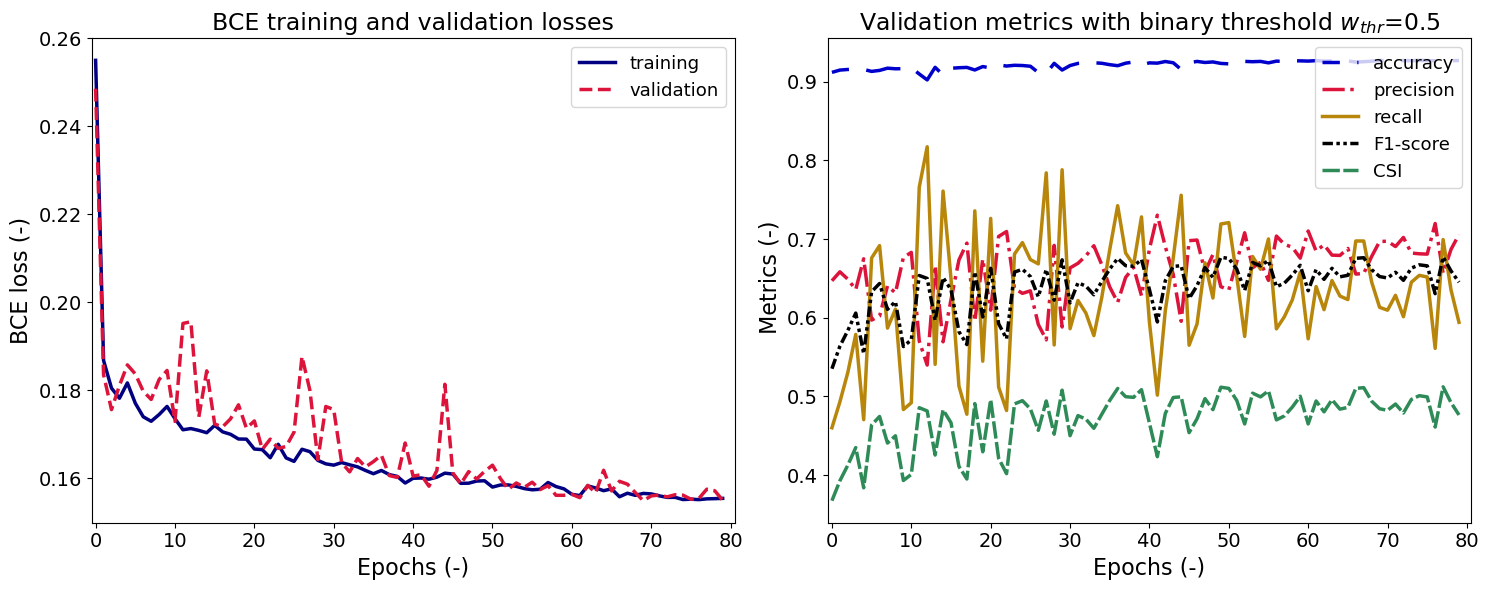

In [30]:
plot_losses_metrics(train_losses, val_losses, metrics, best_model_recall, loss_f=loss_f)

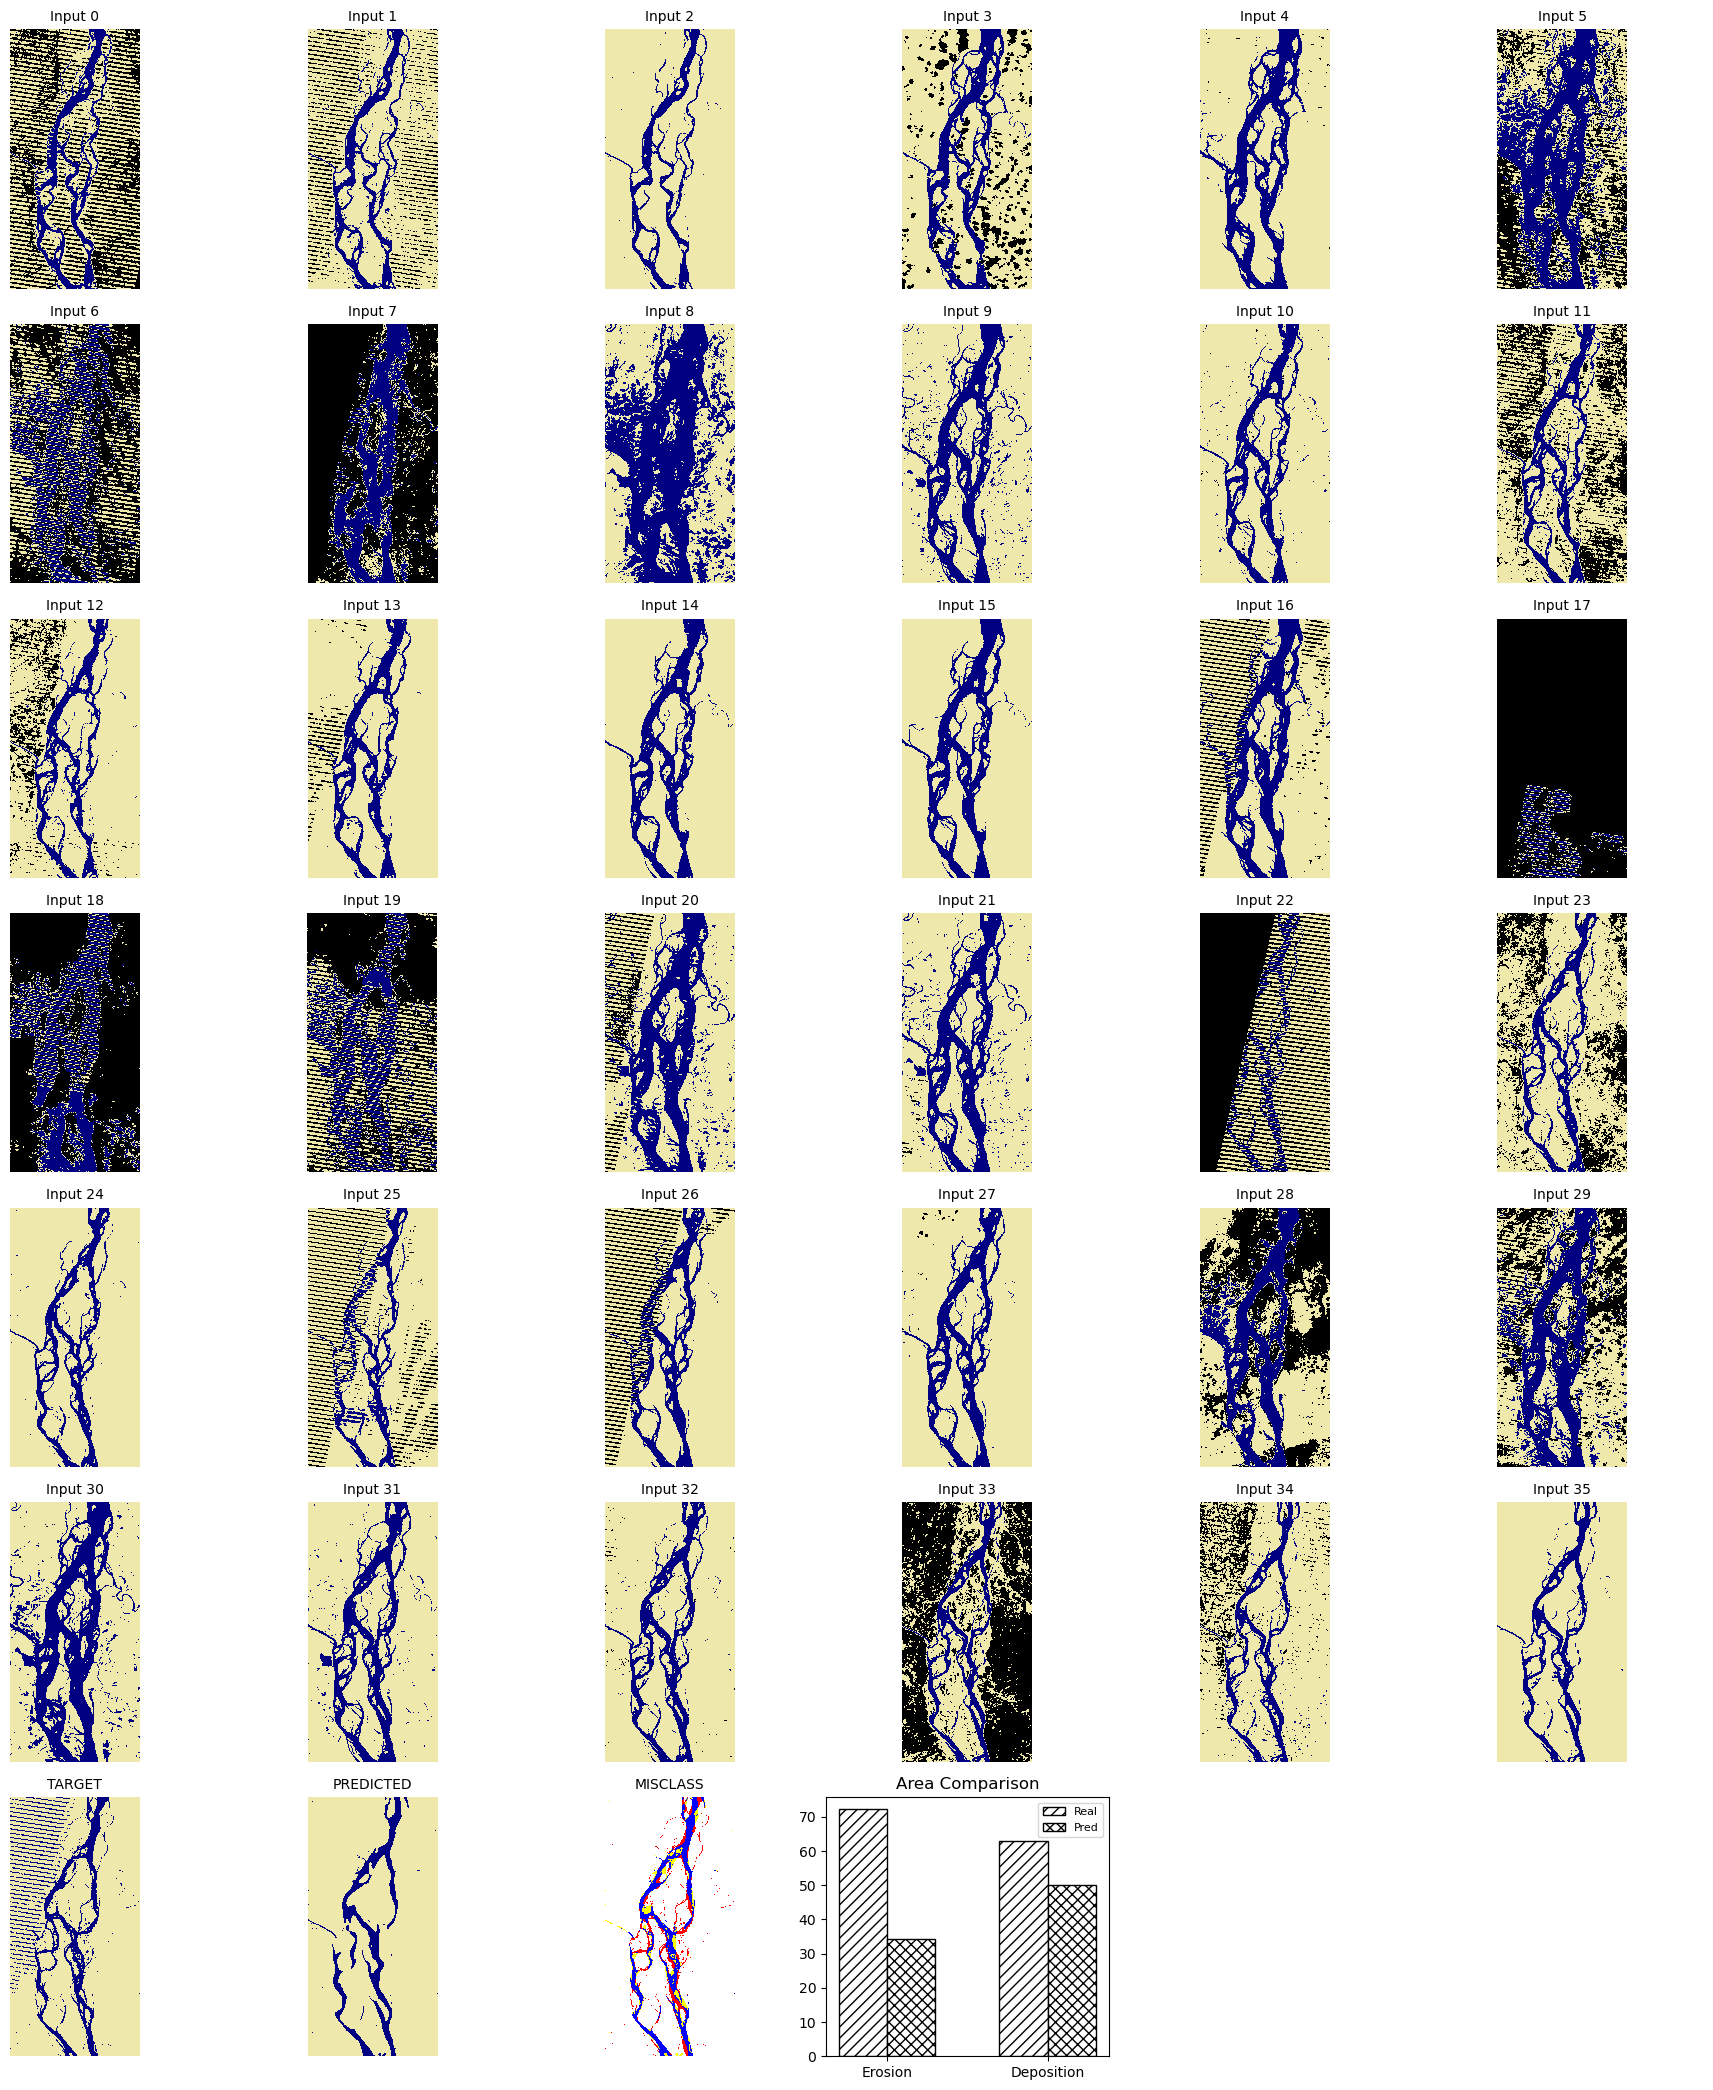

In [31]:
# show_evolution(18, test_set, model_loss)

device = 'cuda:0'
model_loss = model_loss.to(device)

show_all_images(16, test_ds, model_loss, device=device)

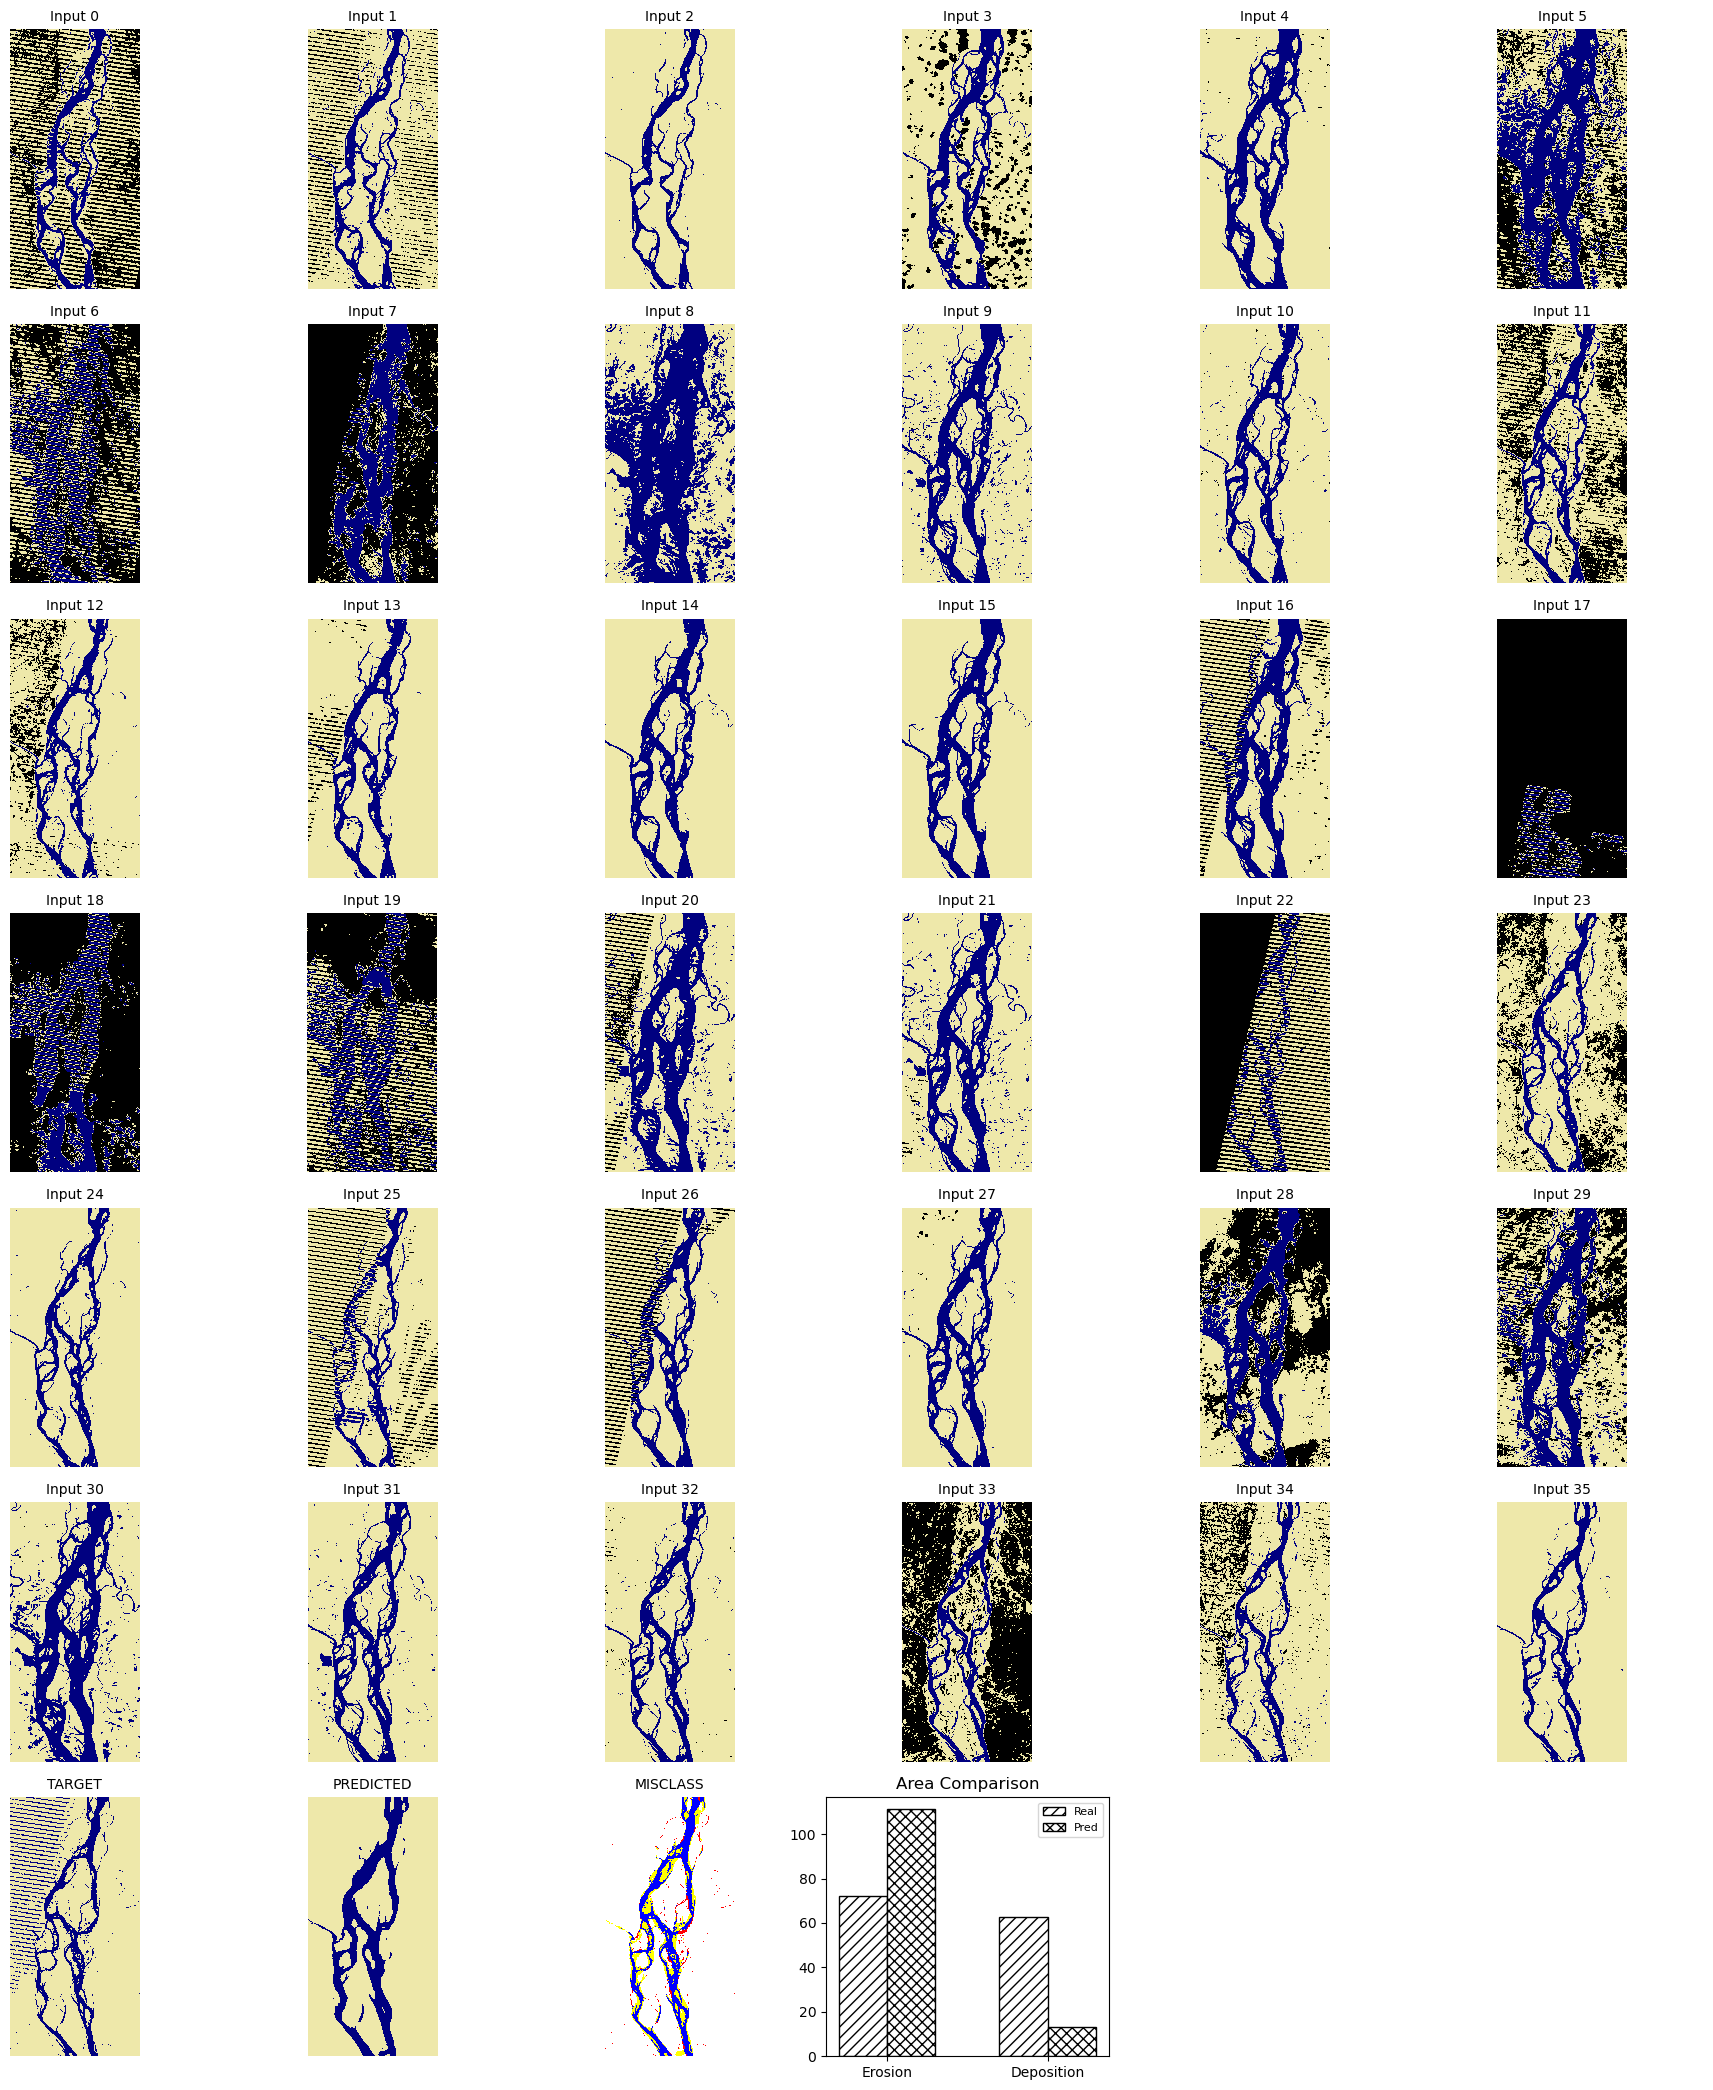

In [32]:
# show_evolution(18, test_set, model_loss)

device = 'cuda:0'
model_loss = model_loss.to(device)

show_all_images(16, test_ds, model_recall, device=device)

In [33]:
# # show_evolution(18, test_set, model_recall)
# show_evolution_nolegend_nn(18, test_set, model_recall, device=device)

In [34]:
# # show_evolution(18, val_set, model_recall)
# show_evolution_nolegend_nn(18, val_set, model_recall, device=device)

In [35]:
# single_roc_curve(model_loss, test_set, sample=18, device=device);

In [36]:
# single_roc_curve(model_recall, test_set, sample=18, device=device);

In [37]:
# get_total_roc_curve(model_loss, test_set, device=device);

In [38]:
# get_total_roc_curve(model_recall, test_set, device=device);

In [39]:
# single_pr_curve(model_loss, test_set, sample=19, device=device)

In [40]:
# # show_evolution(18, test_set, model_loss)
# show_evolution_nolegend_nn(18, test_set, model_loss, device=device)